In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d lexset/synthetic-asl-alphabet
! unzip /content/synthetic-asl-alphabet.zip -d /content/synthetic-asl-alphabet

Streaming output truncated to the last 5000 lines.
  inflating: /content/synthetic-asl-alphabet/Train_Alphabet/U/6f3439aa-c9f3-4279-830c-e7b417425835.rgb_0000.png  
  inflating: /content/synthetic-asl-alphabet/Train_Alphabet/U/6fc70b21-eb34-42e6-8fa5-368a753a311e.rgb_0000.png  
  inflating: /content/synthetic-asl-alphabet/Train_Alphabet/U/700d1cf4-d43f-4d04-ba14-bbb6e9273c38.rgb_0000.png  
  inflating: /content/synthetic-asl-alphabet/Train_Alphabet/U/703451c9-380e-41a3-962e-0ef7290f04ec.rgb_0000.png  
  inflating: /content/synthetic-asl-alphabet/Train_Alphabet/U/7068eb2d-4d24-4a05-bddf-63fc4e296005.rgb_0000.png  
  inflating: /content/synthetic-asl-alphabet/Train_Alphabet/U/706cde46-580e-42d7-8752-2a751d4a2d1a.rgb_0000.png  
  inflating: /content/synthetic-asl-alphabet/Train_Alphabet/U/70a03f73-8d9b-48e1-b7d2-d1269fe44efc.rgb_0000.png  
  inflating: /content/synthetic-asl-alphabet/Train_Alphabet/U/70b8a34d-9529-4ed3-9570-cdf55ae9659e.rgb_0000.png  
  inflating: /content/synthetic-asl-a

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import shutil

import tensorflow as tf
from tensorflow.keras.layers import Rescaling, Dense, Input, Conv2D, BatchNormalization, MaxPool2D, ReLU, GlobalAveragePooling2D, Flatten, Dropout, ELU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

In [ ]:
# get all images full path

data_path = []

data_dir = '/content/synthetic-asl-alphabet'
for root, dirs, files in os.walk(data_dir):
    for name in files:
        data_path.append(os.path.join(root, name))

print(data_path[:10])

#  shuffle the data befor spliting

np.random.shuffle(data_path)
print(data_path[:10])

['/content/synthetic-asl-alphabet/Train_Alphabet/O/b63ce321-4e97-4b7c-a89c-ca84bdff552b.rgb_0000.png', '/content/synthetic-asl-alphabet/Train_Alphabet/O/196a9b25-af02-4df5-b3d9-efe639c6389e.rgb_0000.png', '/content/synthetic-asl-alphabet/Train_Alphabet/O/3129e1ff-fbfb-434c-90e8-5843bebd80a5.rgb_0000.png', '/content/synthetic-asl-alphabet/Train_Alphabet/O/e1f0b9ff-b5a5-46f2-b24b-1d537fcb0ab6.rgb_0000.png', '/content/synthetic-asl-alphabet/Train_Alphabet/O/a22b3384-0537-49e2-baae-d5973a7f386b.rgb_0000.png', '/content/synthetic-asl-alphabet/Train_Alphabet/O/8a931cda-5acb-4fb7-8b55-065386c5f8be.rgb_0000.png', '/content/synthetic-asl-alphabet/Train_Alphabet/O/a2b77985-0449-4198-b02e-e04c64945204.rgb_0000.png', '/content/synthetic-asl-alphabet/Train_Alphabet/O/33f66e7f-c972-46bb-a036-c5ffaa7ac8b5.rgb_0000.png', '/content/synthetic-asl-alphabet/Train_Alphabet/O/15d7c574-c142-4e71-a6a7-f75a4e15d2a6.rgb_0000.png', '/content/synthetic-asl-alphabet/Train_Alphabet/O/8ea6fe26-413e-4329-aead-053a330

In [ ]:
len(data_path)

27000

In [ ]:
# create copy def

def create_data(array, train_p, val_p, test_p, path):
    """
    create a train & test & validation directory structure like:

    dir :
    -- train:
            img1
            img2
            ...
    -- validation:
            img1
            img2
            ...
    -- test:
            img1
            img2
            ...
    
    params:
        array : list of images path
        train_p : train persent value
        val_p : validation persent value
        test_p : test persent value
        path : where create the structure (nwe path)

    """

    # calculate the persent of each subset
    tp = len(array) * train_p // 100
    vp = len(array) * val_p // 100
    testp = len(array) * test_p // 100

    # condetional selecting for eath subset 
    train_list = array[:tp]
    val_list = array[tp:tp+vp]
    test_list = array[tp + vp :]

    print('train_list : ', len(train_list), 'images val_list : ', len(val_list), 'images test_list : ', len(test_list), 'images')

    for i in train_list:
        
        dir_name = i.split('/')[-2]
        train_path = path + '/train'

        os.makedirs(os.path.join(train_path, dir_name), exist_ok=True)
        # print(os.path.join(train_path , dir_name))
        shutil.copy(i, os.path.join(train_path, dir_name))
    print('train done')

    for i in val_list:
        
        dir_name = i.split('/')[-2]
        validation_path = path + '/validation'
        
        os.makedirs(os.path.join(validation_path, dir_name), exist_ok=True)
        # print(os.path.join(validation_path , dir_name))
        shutil.copy(i, os.path.join(validation_path, dir_name))
    print('validation done')

    for i in test_list:
        
        dir_name = i.split('/')[-2]
        test_path = path + '/test'
        
        os.makedirs(os.path.join(test_path, dir_name), exist_ok=True)
        # print(os.path.join(test_path , dir_name))
        shutil.copy(i, os.path.join(test_path, dir_name))
    print('test done')

In [ ]:
create_data(data_path, 80, 10, 10, '/content/ASL')


train_list :  21600 images val_list :  2700 images test_list :  2700 images
train done
validation done
test done


In [ ]:
train_data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range= (0.1, 2),

    )

val_data_gen = ImageDataGenerator(
    rescale=1./255,
    )
test_data_gen = ImageDataGenerator(
    rescale=1./255,
    )

In [ ]:
# flow_from_directory

train_data = train_data_gen.flow_from_directory(
    directory='/content/ASL/train',
    batch_size = 64,
    target_size=(224, 224),
    subset = 'training'
)

validation_data = val_data_gen.flow_from_directory(
    directory = '/content/ASL/validation',
    batch_size = 64,
    target_size=(224, 224),
)
test_data = val_data_gen.flow_from_directory(
    directory = '/content/ASL/test',
    batch_size = 64,
    target_size=(224, 224),
)

Found 21600 images belonging to 27 classes.
Found 2700 images belonging to 27 classes.
Found 2700 images belonging to 27 classes.


dict_items([(0, 790), (1, 802), (2, 801), (3, 798), (4, 804), (5, 793), (6, 802), (7, 801), (8, 805), (9, 799), (10, 832), (11, 780), (12, 786), (13, 825), (14, 772), (15, 790), (16, 832), (17, 808), (18, 790), (19, 809), (20, 794), (21, 778), (22, 784), (23, 812), (24, 788), (25, 809), (26, 816)])


<BarContainer object of 27 artists>

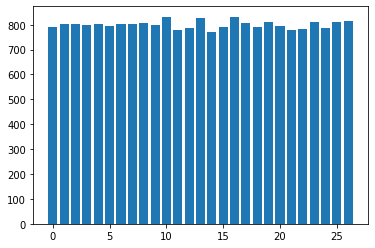

In [ ]:
from collections import Counter
counter = Counter(train_data.classes)
plt.bar(range(len(counter.items())), [item[1] for item in counter.items()], align='center')

<BarContainer object of 27 artists>

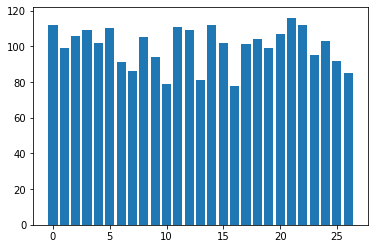

In [ ]:
from collections import Counter
counter = Counter(validation_data.classes)
plt.bar(range(len(counter.items())), [item[1] for item in counter.items()], align='center')

<BarContainer object of 27 artists>

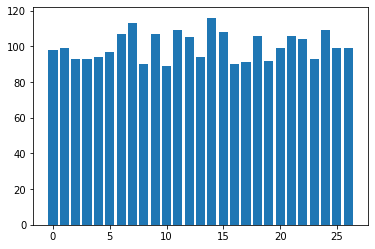

In [ ]:
from collections import Counter
counter = Counter(test_data.classes)
plt.bar(range(len(counter.items())), [item[1] for item in counter.items()], align='center')

In [ ]:
classes = {str(y): x for x, y in train_data.class_indices.items()}

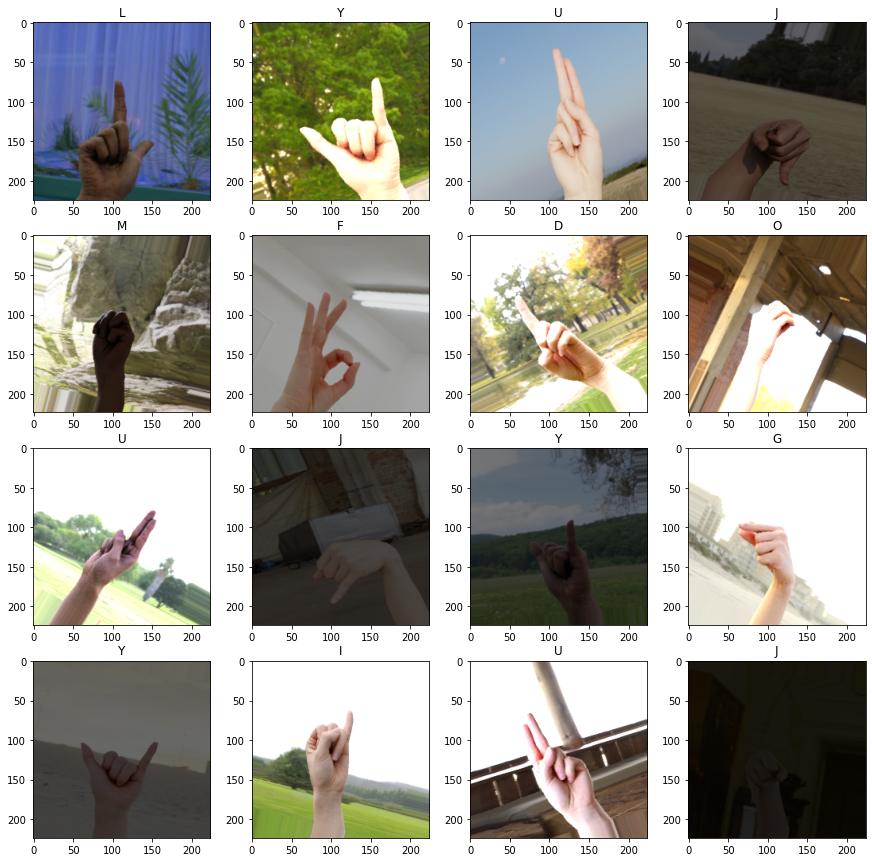

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(16):
    plot = plt.subplot(4,4,i+1)
    img, label = train_data.next()
    # print(np.round([img[0].max(), img[0].min()]))
    plot.imshow(img[0])
    label_index = list(label[0]).index(1)
    plot.set_title(classes[str(label_index)])

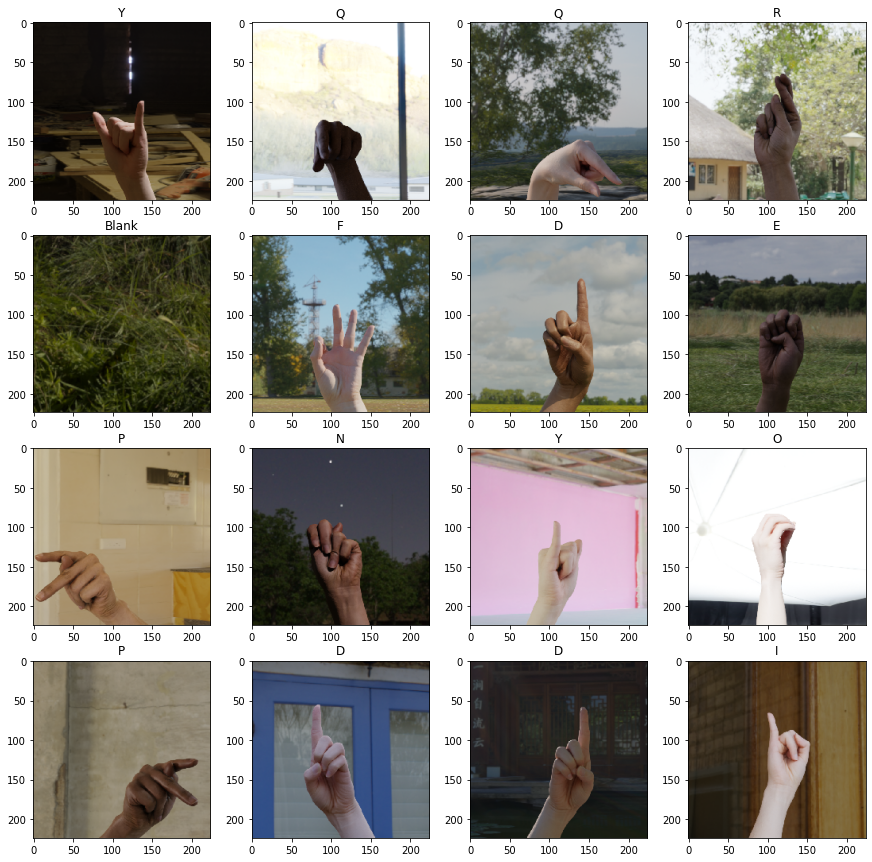

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(16):
    plot = plt.subplot(4,4,i+1)
    img, label = validation_data.next()
    plot.imshow(img[0])
    label_index = list(label[0]).index(1)
    plot.set_title(classes[str(label_index)])

In [ ]:
# create model from transfer learning

base_model = tf.keras.applications.MobileNet(
    include_top = False,
    weights = 'imagenet',
    input_shape = (224,224,3)
)

i = base_model.input

# delet the last max_pool layer from base model after looking the base model summary

x = base_model.output
x = GlobalAveragePooling2D()(x)
fc1 = Dense(units = 128, activation ='relu')(x)
o = Dense(units = 27, activation ='softmax')(fc1)

model = Model(i, o)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [ ]:
# callbacks
earlystop = tf.keras.callbacks.EarlyStopping(patience=7, restore_best_weights=True, verbose=1)

model_checkpoint = ModelCheckpoint('/content/drive/MyDrive/alphabet_dataset_Mobailnet.h5', monitor='val_loss', save_best_only=True, verbose=1)

reduse_learing_rate = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=3,
    verbose=1,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=0.00000001,
)
# complie the model
model.compile(optimizer=Adam(learning_rate = 0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_data, validation_data=validation_data, epochs=10, callbacks=[earlystop, model_checkpoint, reduse_learing_rate ])

Epoch 1/10
338/338 [==============================] - ETA: 0s - loss: 0.7270 - accuracy: 0.8217
Epoch 1: val_loss improved from inf to 0.03074, saving model to /content/drive/MyDrive/alphabet_dataset_Mobailnet.h5
338/338 [==============================] - 671s 2s/step - loss: 0.7270 - accuracy: 0.8217 - val_loss: 0.0307 - val_accuracy: 0.9937 - lr: 1.0000e-04
Epoch 2/10
338/338 [==============================] - ETA: 0s - loss: 0.0505 - accuracy: 0.9883
Epoch 2: val_loss improved from 0.03074 to 0.00744, saving model to /content/drive/MyDrive/alphabet_dataset_Mobailnet.h5
338/338 [==============================] - 629s 2s/step - loss: 0.0505 - accuracy: 0.9883 - val_loss: 0.0074 - val_accuracy: 0.9993 - lr: 1.0000e-04
Epoch 3/10
338/338 [==============================] - ETA: 0s - loss: 0.0256 - accuracy: 0.9941
Epoch 3: val_loss improved from 0.00744 to 0.00293, saving model to /content/drive/MyDrive/alphabet_dataset_Mobailnet.h5
338/338 [==============================] - 619s 2s/step

In [ ]:
model.evaluate(test_data)

43/43 [==============================] - 39s 899ms/step - loss: 4.5558e-04 - accuracy: 1.0000


[0.0004555774212349206, 1.0]

In [ ]:
hist =history.history

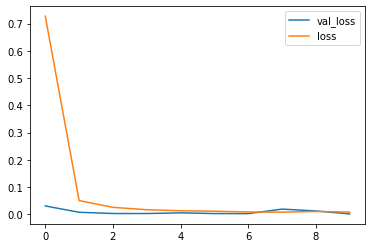

In [ ]:
plt.plot(hist['val_loss'], label='val_loss')
plt.plot(hist['loss'], label='loss')
plt.legend()
plt.savefig('./loss.png')
plt.show()

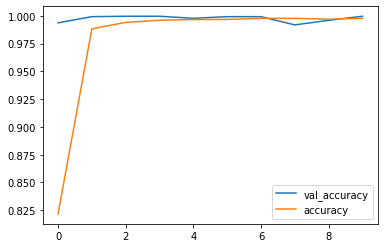

In [ ]:
plt.plot(hist['val_accuracy'], label='val_accuracy')
plt.plot(hist['accuracy'], label='accuracy')
plt.legend()
plt.savefig('./accuracy.png')

plt.show()

Normalized confusion matrix
[[0.04464286 0.00892857 0.03571429 0.04464286 0.01785714 0.04464286
  0.02678571 0.05357143 0.01785714 0.01785714 0.03571429 0.0625
  0.02678571 0.02678571 0.04464286 0.07142857 0.03571429 0.03571429
  0.04464286 0.04464286 0.02678571 0.0625     0.0625     0.01785714
  0.03571429 0.02678571 0.02678571]
 [0.03030303 0.03030303 0.02020202 0.03030303 0.03030303 0.03030303
  0.08080808 0.06060606 0.03030303 0.12121212 0.06060606 0.04040404
  0.04040404 0.01010101 0.03030303 0.02020202 0.04040404 0.04040404
  0.02020202 0.02020202 0.02020202 0.02020202 0.05050505 0.05050505
  0.02020202 0.02020202 0.03030303]
 [0.04716981 0.03773585 0.02830189 0.00943396 0.02830189 0.00943396
  0.03773585 0.05660377 0.02830189 0.04716981 0.04716981 0.04716981
  0.03773585 0.04716981 0.02830189 0.04716981 0.02830189 0.04716981
  0.02830189 0.02830189 0.04716981 0.03773585 0.00943396 0.01886792
  0.06603774 0.03773585 0.06603774]
 [0.00917431 0.02752294 0.02752294 0.06422018 0.0275

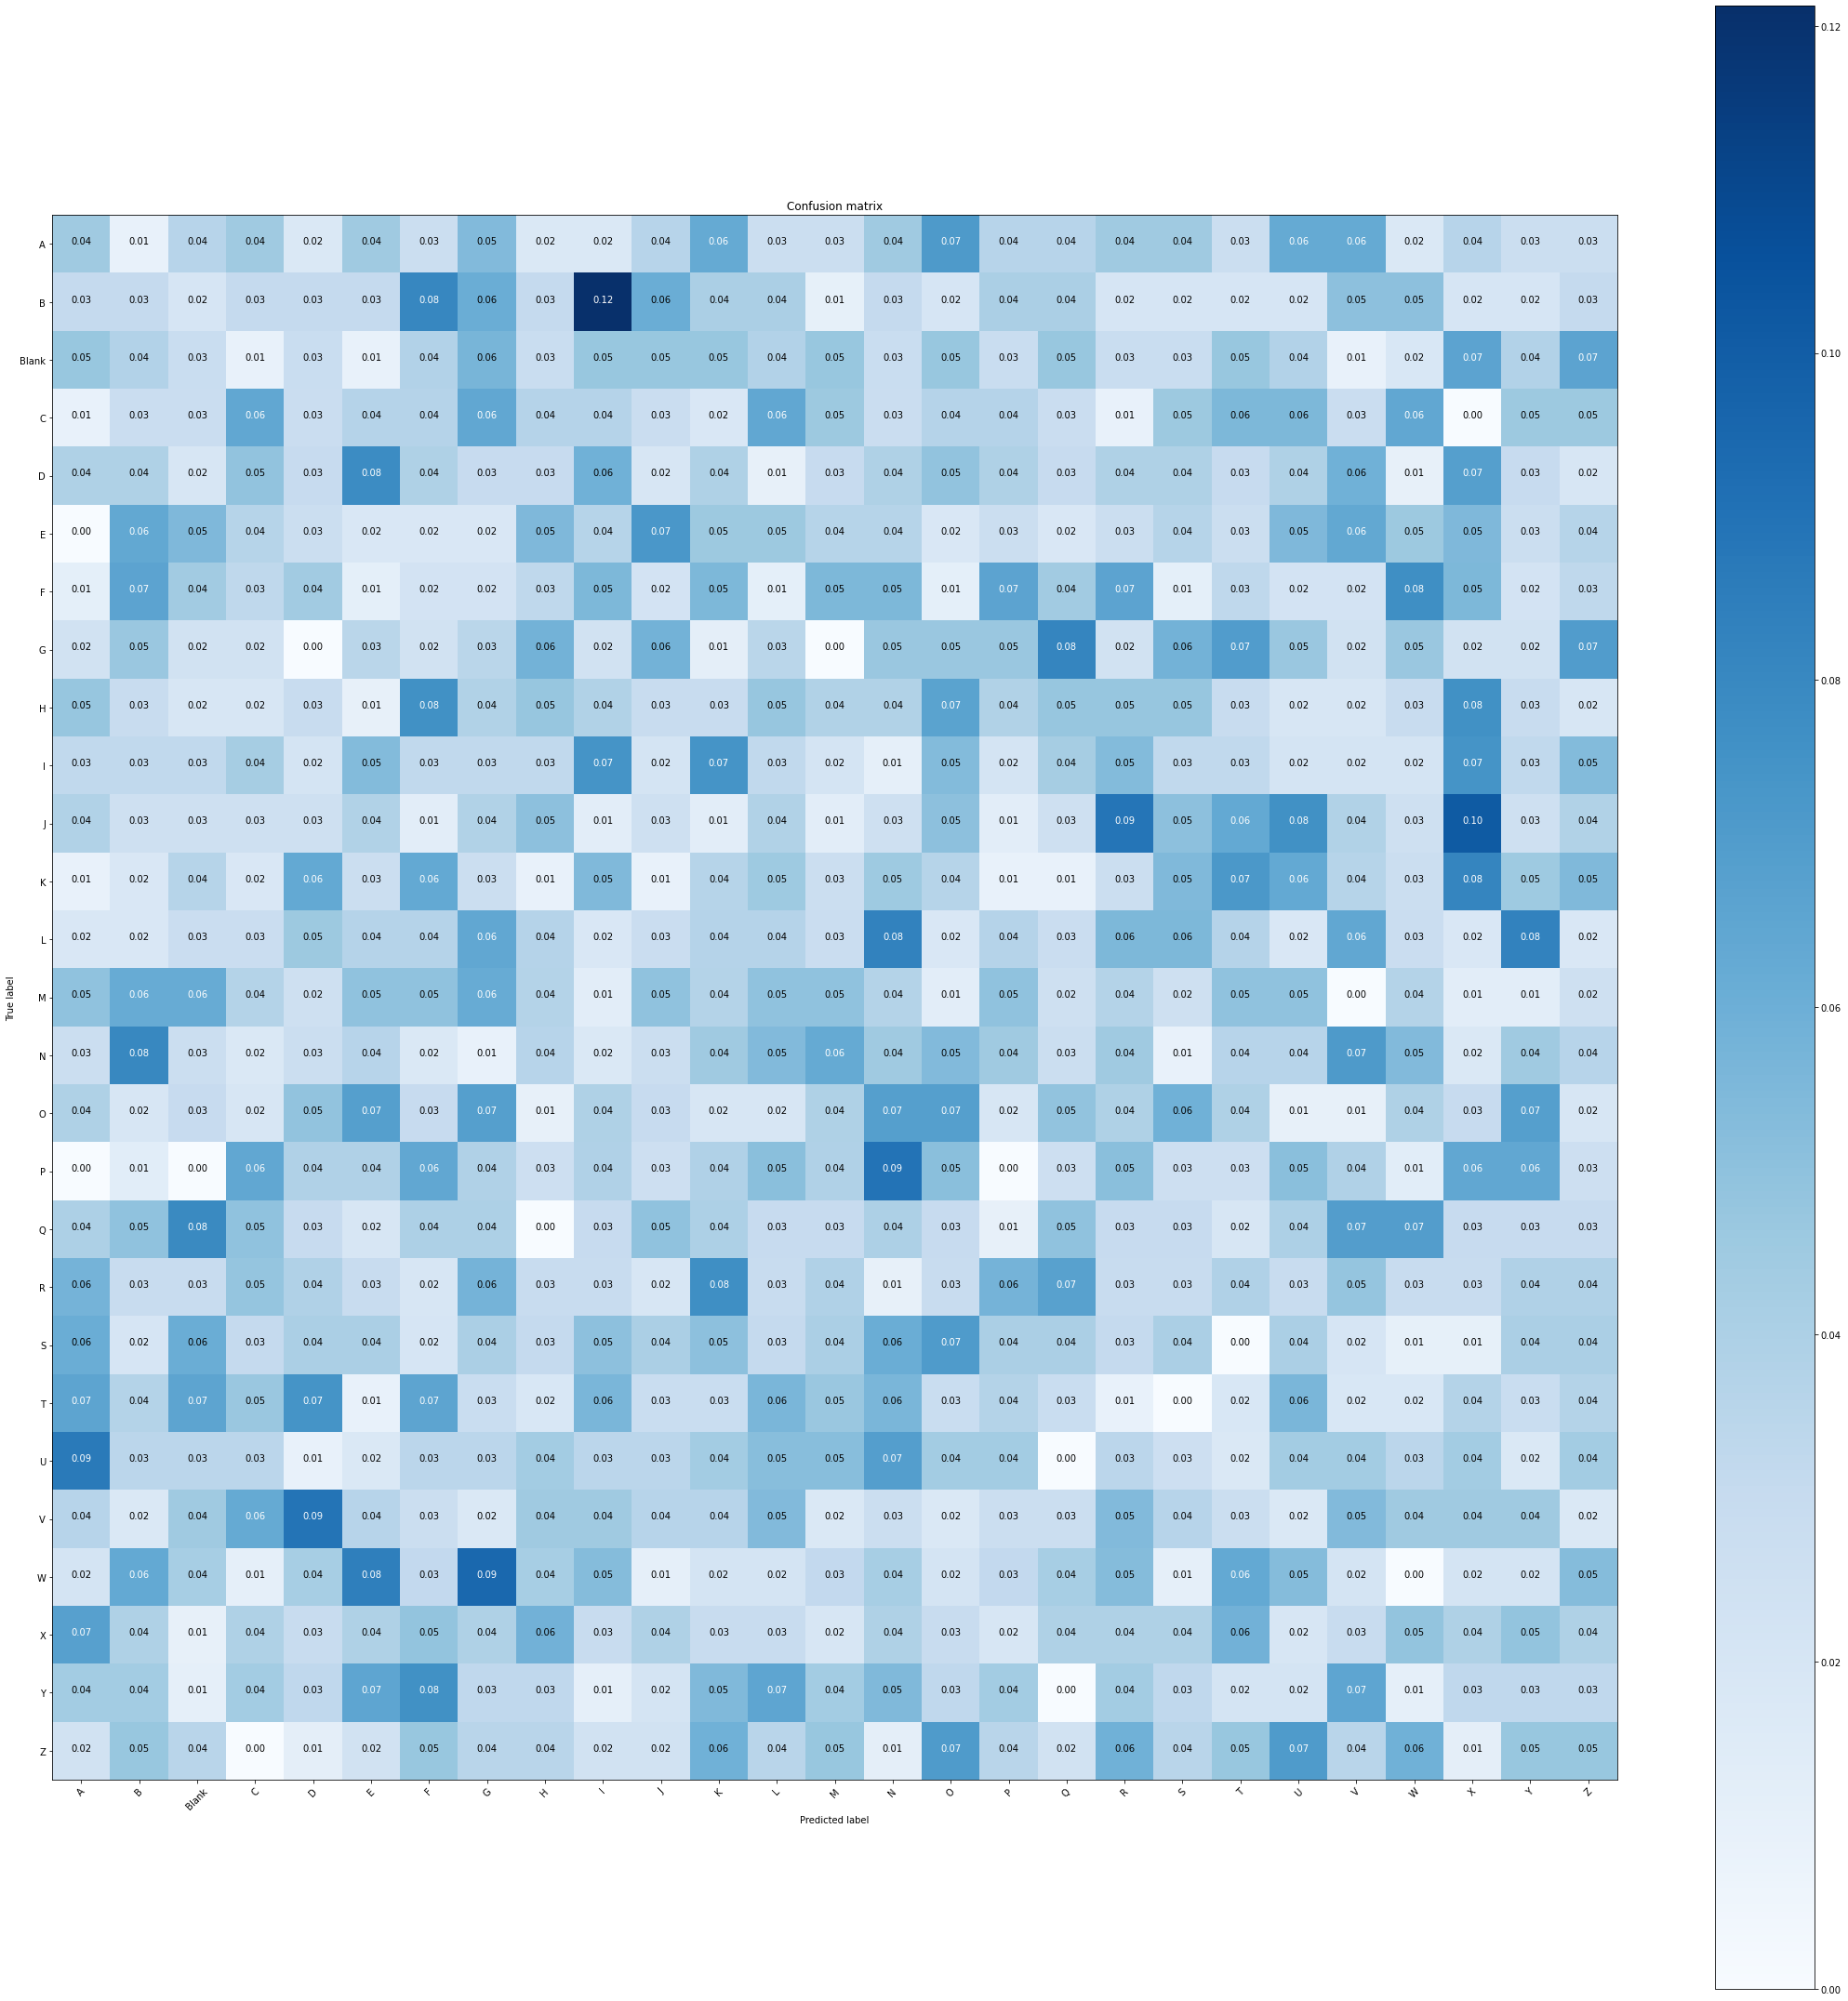

In [ ]:
predict = model.predict(test_data)
per = []
for i in predict:
    ii = list(i)
    per.append(ii.index(np.max(i)))

# confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.figure(figsize=(30, 30))

    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')

    plt.xlabel('Predicted label')
    plt.savefig('./mc.png')

plot_confusion_matrix(confusion_matrix(validation_data.classes, per), classes=validation_data.class_indices.keys(), normalize=True)